# Atividade 02 - Classificadores 

* Regressão logística
* Discriminate Quadrático Gaussiano
* Naive Bayes Gaussiano

### Nome: Alessandro Souza Siva, matrícula: 399941

### Questão 01
#### Implementação dos classificadores
Todos os métodos implementados estão salvos no módulo Classificadores!

In [1]:
from Classificadores import RegressaoLogistica, DiscriminanteQuadraticoGaussiano, NaiveBayesGaussiano

### Questão 02, Questão 03 e Questão 04
#### Implementação das funções para cálculo da acurácia, 1plot da matriz de confusão e plot das fronteiras 
Os métodos implementados estão salvo no módulo Utils

In [2]:
from Utils import accuracy, plot_confusion_matrix, plot_boundaries

### Conjunto de dados

#### Leitura do conjunto de dados

In [3]:
import pandas as pd

data = pd.read_csv("./data/ex2data1.txt", sep=",", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### Separando os dados em treino e teste

In [4]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [6]:
print("x_train shape:",x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (70, 2)
x_test shape: (30, 2)
y_train shape: (70, 1)
y_test shape: (30, 1)


### Relatório

In [7]:
import matplotlib.pyplot as plt

#### Normalizando os dados

In [8]:
from Utils import normalization

In [9]:
x_train, x_test = normalization(x_train, x_test)

#### Regressão Logística

In [10]:
regLogistica = RegressaoLogistica()

regLogistica.fit( x_train, y_train )

y_predict = regLogistica.predict( x_test )

In [11]:
print( "Acurácia", accuracy(y_test, y_predict) )

Acurácia 0.9


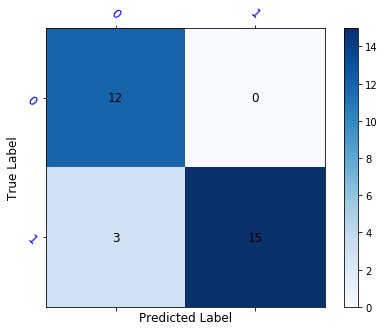

In [12]:
plot_confusion_matrix(x_test,y_test,regLogistica)

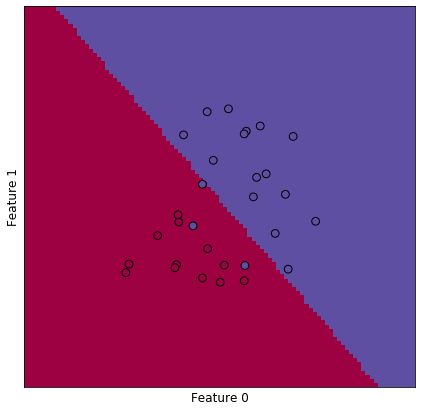

In [13]:
plot_boundaries(x_test,y_test,regLogistica)

#### Discriminante Quadrático Gaussiano

In [14]:
disQuadratico = DiscriminanteQuadraticoGaussiano()

disQuadratico.fit( x_train, y_train )

y_predict = disQuadratico.predict( x_test )

In [15]:
print( "Acurácia:", accuracy(y_test, y_predict) )

Acurácia: 0.9333333333333333


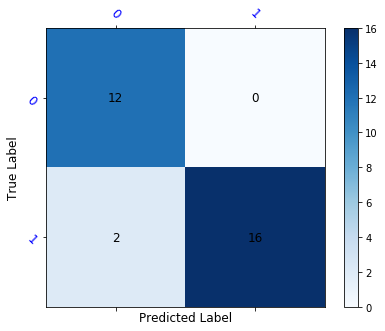

In [16]:
plot_confusion_matrix(x_test,y_test,disQuadratico)

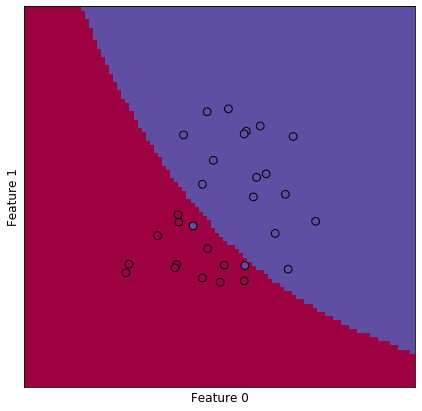

In [17]:
plot_boundaries(x_test,y_test,disQuadratico)

#### Naive Bayes Gaussiano

In [18]:
naiveBayes = NaiveBayesGaussiano()

naiveBayes.fit( x_train, y_train )

y_predict = naiveBayes.predict( x_test )

In [19]:
print( "Acurácia:", accuracy(y_test, y_predict) )

Acurácia: 0.9666666666666667


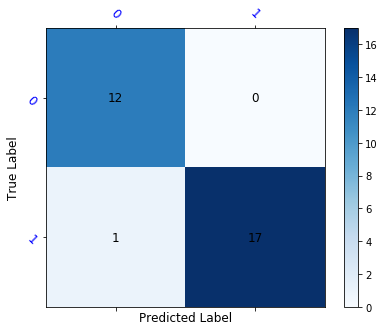

In [20]:
plot_confusion_matrix(x_test,y_test,naiveBayes)

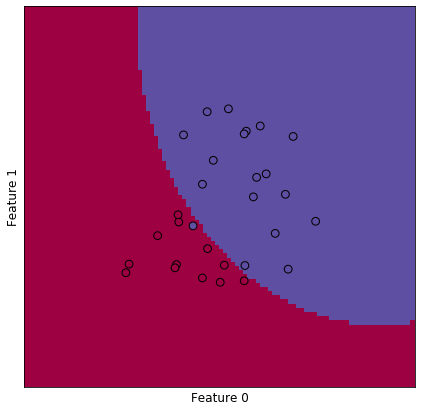

In [21]:
plot_boundaries(x_test,y_test,naiveBayes)

#### Resumo

| **Classificador**            | **Acurácia** | **Produz fronteiras lineares?** |
|--------------------------|----------|-----------------------------|
| Regressão Logística      |    90%   |             Sim             |
| Discriminante Quadrático |    93%   |             Não             |
| Naive Bayes              |    **96%**   |             Não             |

Os dados não são linearmente separáveis devido a apenas duas instâncias! Por isso os métodos Discriminante Quadrático e Naive Bayes se sairam melhor do que a Regressão Logística ( essa última produz fronteiras lineares enquanto os demais não ). Assim, o classificador com maior acurácia foi o Naive Bayes!